<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session11/Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import neceesary modules

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
from keras import regularizers
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


## Load and Prepare Data

In [0]:
# Import and load cifar10 dataset

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols,img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

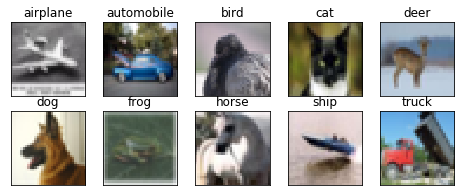

In [3]:
# Display randomly selected examples from each of the classes
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Stadandardize the data by converting it to float32 and dividing by max pixel value 255
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define a function to plot training and test accuracies and losses during the training

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# define a function to calculate accuracy based on passed model, test data and test labels
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## Model Definition


In [7]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())

model1.add(Activation('softmax'))

model1.summary()

from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), kernel_regularizer=<keras.reg..., input_shape=(32, 32, 3..., padding="same")`
  





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), kernel_regularizer=<keras.reg..., padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1))`


## Learning Rate Finder

In [0]:
from matplotlib import pyplot as plt
import math
from keras.callbacks import LambdaCallback
from keras.callbacks import Callback
import keras.backend as K
import numpy as np
import os

# Define Learning rate finder class
# This class is inherited from callback class so that its instance can be 
# used as callback function in model fit() and fit_generator() functions
class LR_Finder(Callback):
    
    # Define constructor
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)

    # This will be called at the beginning of training 
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)

    # This will be called after each batch ending    
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        # Smoothen the loss log so that its plot will be better help visualization
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

## Cutout

In [0]:
import numpy as np
# Define the cutout eraser. The eraser function will apply cutouts of
# random size, proportion and aspect ratios

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
  """ It returns eraser function to apply cutout on input image

    Parameters:
    p   : probability of cutout application
    s_l : min cutout area proportion
    s_h : max cutout area proportion
    r_1 : min aspect ratio
    r_2 : max aspect ratio
    v_l : min value for erased area
    v_h : max value for erased area
    pixel_level(bool) : whether to apply random pixel values in cutout area

    Returns:
    eraser function which applies cutout to the input image.

   """

  def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

  return eraser

In [0]:
# define the cutout eraser with probability of cutout 50%, min and max cutout area proportions 0.02 and 0.4
# Min and max aspect ratios 0.3 and 1/0.3, min and max values for erased areas as 0.0 and 1.0
eraser = get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,
                  v_l=0.0, v_h=1.0, pixel_level=False)

In [0]:
# Use keras ImageDataGenerator to obtain normalized training and testing data batches

from keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for image normalization for training
datagenTrain = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False,preprocessing_function=eraser)

# Learn stats of training data eg. mean, std
datagenTrain.fit(train_features)

# Define batch size
BS=128

# Generate an iterator for training. It will provide nomalized image data of size BS for training
train_iterator = datagenTrain.flow(train_features, train_labels, batch_size = BS)


# Since we will train the model on normalized image data we must used normalized images for validation as well
# Initialize ImageDataGenerator for image normalization for testing
datagenTest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of testing data eg. mean, std
datagenTest.fit(test_features)

# Generate an iterator for training. It will provide nomalized image data of size BS for testing
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = BS)

## Learning Rate search

In [0]:
BS = 128
# Get an instance of LR_Finder class for learning rates varying from 1e-6 to 10
lr_finder = LR_Finder(start_lr=1e-6, end_lr=10, step_size=np.ceil(train_features.shape[0]/BS))

# perform model model training with learning rate finder as callback function
model1.fit_generator(train_iterator, steps_per_epoch = (len(train_features)//BS), 
                                                      callbacks=[lr_finder],verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
383/390 [============================>.] - ETA: 0s - loss: 3.4077 - acc: 0.2222

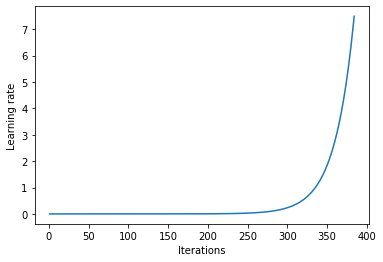

In [0]:
# Plot how Learning rate is varied
lr_finder.plot_lr()

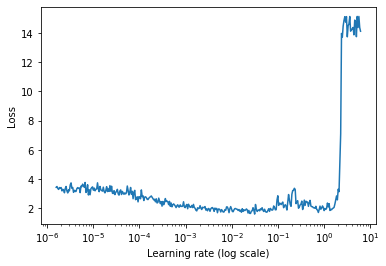

In [0]:
# Plot how loss varies with learing rate
lr_finder.plot()

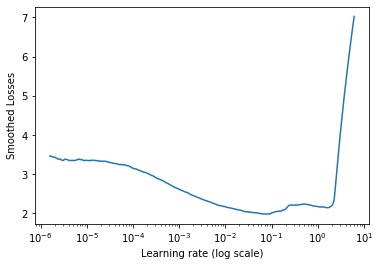

In [0]:
# Plot smoothed version of loss variation with learning rate
lr_finder.plot_smoothed_loss()

From the above plot we can see that from 1e-4 loss starts reducing till 1e-1 after which it starts increasing. So we can start with learning rate of 1e-1 and using learning rate scheduler we can reduce learning rate towards 1e-4 as we train the model

## Model Training

In [15]:
# Setup checkpoint callback
from google.colab import drive
from keras.callbacks import ModelCheckpoint

# mount google drive to save best model 
drive.mount('/content/gdrive')


# File name of best model
fileName = '/content/gdrive/My Drive/TSAI/Session11/Best-ModelWeights.hdf5'

# Monitor Validation accuracy and each time accuracy improves, overwrite the model in 'Best-Model.hdf5' 
checkpoint = ModelCheckpoint(fileName,monitor='val_acc', verbose=0, save_best_only=True, mode='auto')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.020000000298023225.

Epoch 00044: ReduceLROnPlateau reducing learning rate to 0.003999999910593033.

Epoch 00052: ReduceLROnPlateau reducing learning rate to 0.0007999999448657036.

Epoch 00074: ReduceLROnPlateau reducing learning rate to 0.00015999998431652786.

Epoch 00081: ReduceLROnPlateau reducing learning rate to 3.199999628122896e-05.

Epoch 00086: ReduceLROnPlateau reducing learning rate to 6.399999256245792e-06.

Epoch 00091: ReduceLROnPlateau reducing learning rate to 1.2799998330592645e-06.

Epoch 00100: ReduceLROnPlateau reducing learning rate to 1e-06.
Model took 840.87 seconds to train


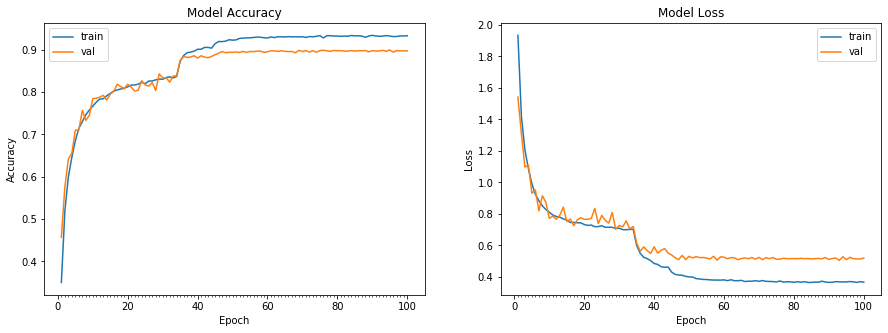

In [0]:
from keras.callbacks import ReduceLROnPlateau

# Use SGD optimizer with learning rate of 0.1 and momentum of 0.9
sgd = optimizers.SGD(lr=0.1, decay=0, momentum=0.9, nesterov=False)
model1.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])

rlrop = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, min_lr=0.000001,verbose=1)

start = time.time()

# Train the model
# argument 'steps_per_epoch' defines how many times train_iterator will be asked for batches of training data
# argument 'validation_steps' defines how many times test_iterator will be asked for batches of validation data
# here validation is being performed in batches instead of one shot to avoid using up too much memory while training
model_info = model1.fit_generator(train_iterator, steps_per_epoch = (len(train_features)//BS), epochs = 100, 
                                 validation_data = test_iterator, validation_steps = (len(test_features)//BS),
                                   callbacks=[checkpoint, rlrop],verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)


## Best Accuracy computation

In [16]:
model1.load_weights(fileName)

datagenTest.fit(test_features)
test_iteratorEntireSet = datagenTest.flow(test_features, test_labels, batch_size = len(test_features),shuffle=False)
batchX,batchY = test_iteratorEntireSet.next()
print('Best accuracy obtained = {}'.format(accuracy(batchX,batchY,model1)))

Best accuracy obtained = 89.72


## GradCam on Misclassified images

In [0]:
# Define function to apply gradCam algorithm. Defining function for this 
# allows reusability.


def computeGradCam(model,layerName,inputImage,preProcessedImage,classId = -1): 
  """
  Given cnn model,layer name,original untouched image, preprocessed image and 
  image id, this function applies gradCam algorithm on the model for given layer and 
  input image for provided class id and returns the image with heatmap superimposed over it.

  Parameters:
  model - Trained cnn model for which gradCam is required
  layerName - Name of the model layer at which gradCam is to be applied
  inputImage - Original untouched input image
  preProcessedImage - Image with necessary preprocessing for given model
  classId - '-1' should be passed if GradCam on model predicted class is required. else 
              class id w.r.t which gradCam is to be calculated must be passed   

  Returns: Image with gradCam heatmap superimposed on the image from original dataset                             
  """ 

  # Get model prediction for given input image
  preds = model.predict(preProcessedImage)

  # Decide the class Id
  if classId == -1:  # use prediction obtained from trained model
    class_idx = np.argmax(preds[0])
  else:              # otherwise use the class id passed as argument
    class_idx = classId

  # Take output for the given class Id
  class_output = model.output[:, class_idx]
  # Get the convolution layer for which GradCam is required
  conv_layer = model.get_layer(layerName)

  # Compute the gradient of the class output value with respect to the feature map
  grads = K.gradients(class_output,conv_layer.output)[0]
  
  # Pool the gradients over all the axes leaving out the channel dimension
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  
  iterate = K.function([model.input], [pooled_grads, conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([preProcessedImage])

  # Weigh the output feature map with the computed gradient values
  for i in range(conv_layer.output_shape[3]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)

  # Normalize the heat map to make the values between 0 and 1
  if(np.max(heatmap) != 0):
    heatmap /= np.max(heatmap)    

  # Resize the heatmap to match its size with that of input image
  heatmap = cv2.resize(heatmap, (inputImage.shape[1], inputImage.shape[0]))
  heatmap = np.uint8(255 * heatmap)

  # Get a heatmap by applying opencv colormap
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  
  # Superimpose the heatmap over the original image
  superimposed_img = cv2.addWeighted(inputImage, 0.6, heatmap, 0.4, 0)
  
  return superimposed_img


In [0]:
# Get model prediction for entire test dataset
result = model1.predict(batchX)
# Prediction obtained is in one hot encoding format so we must get actual class numbers
predictedClasses = np.argmax(result, axis=1)
# Get the true class labels
trueClasses = np.argmax(batchY, axis=1)

# Obtain indexes of misclassified images
misClassified = predictedClasses != trueClasses
misIndex = [i for i,val in enumerate(misClassified) if val == True]  

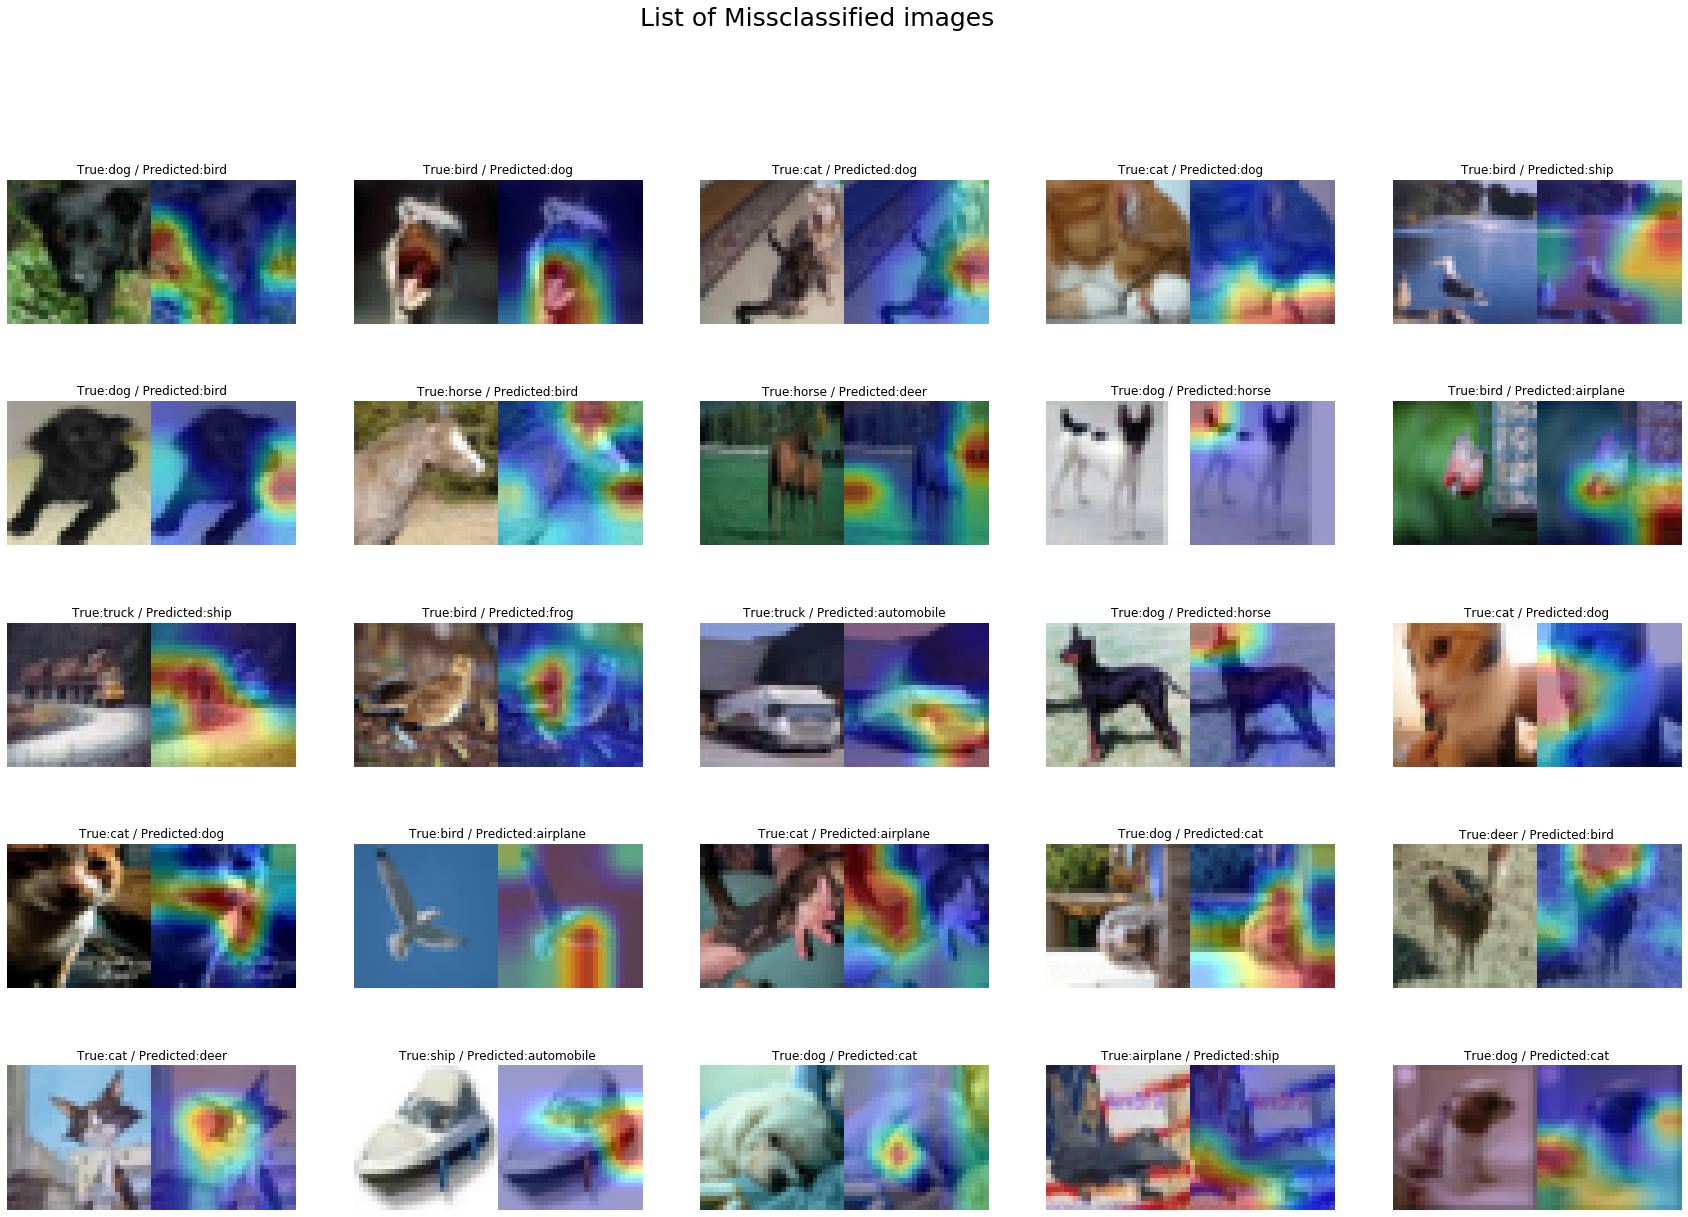

In [20]:
# GradCam on last convolution layer

import matplotlib.pyplot as plt
import cv2
import random

(train_features2, train_labels2), (test_features2, test_labels2) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Set number of rows and columns for gallery of misclassified images
rows = 5
cols = 5

misClassifiedRandIndex = random.sample(misIndex,rows*cols)  
# Generate a rows x cols sized image grid 
f, axarr = plt.subplots(rows,cols)


count = 0
for i in misClassifiedRandIndex :
  processedImage = np.expand_dims(batchX[i], axis=0)
  supImage = computeGradCam(model1,"conv2d_9",test_features2[i],processedImage,-1)
  supImage = cv2.cvtColor(supImage, cv2.COLOR_BGR2RGB)
  concatImg = cv2.hconcat([test_features2[i],supImage])
  axarr[count // rows][count % cols].imshow(concatImg)
  axarr[count // rows][count % cols].set_title('True:{} / Predicted:{}'.format(class_names[trueClasses[i]],class_names[predictedClasses[i]]),fontsize=12)
  axarr[count // rows][count % cols].axis('off')
  count += 1       

             
    
f.subplots_adjust(hspace=0.1,wspace=0.2)    
f.suptitle('List of Missclassified images', fontsize=25)
f.set_size_inches(30,20)


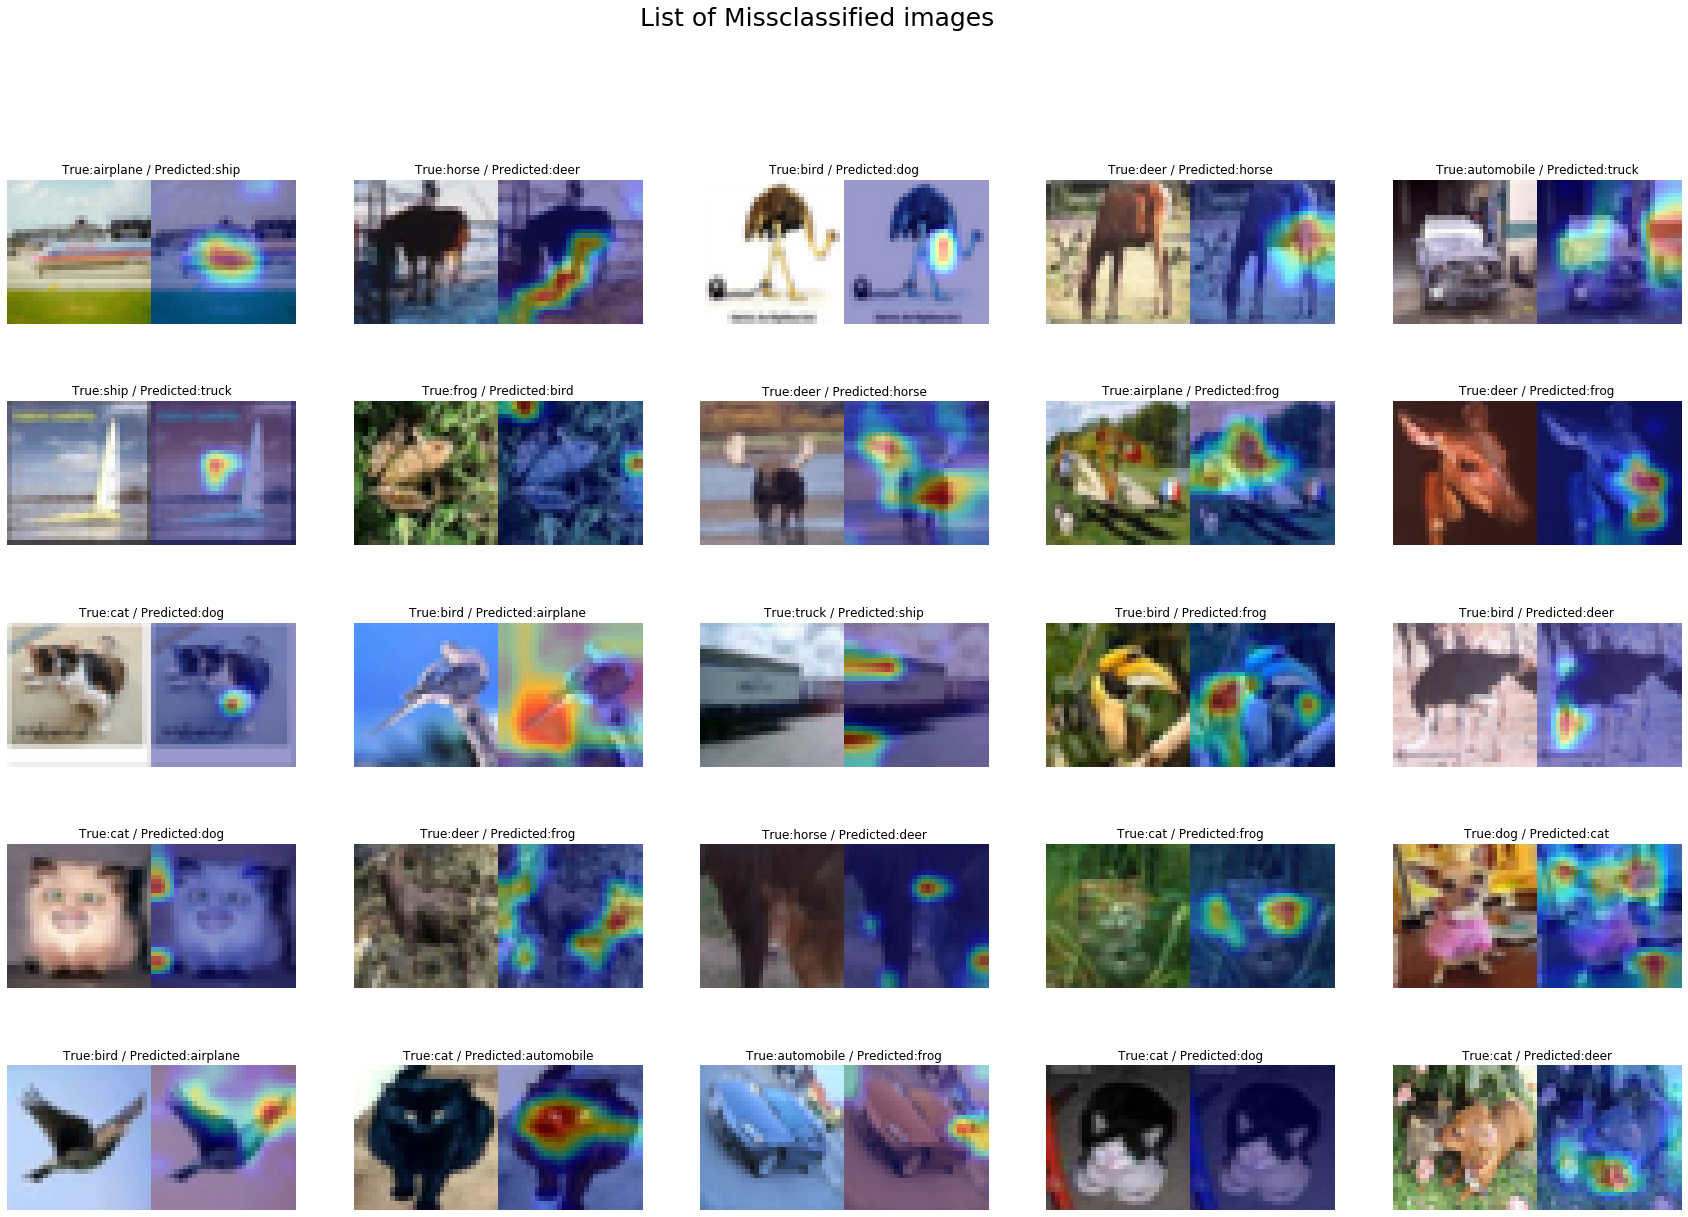

In [19]:
# GradCam on one layer before last convolution layer
import matplotlib.pyplot as plt
import cv2
import random

(train_features2, train_labels2), (test_features2, test_labels2) = cifar10.load_data()

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Set number of rows and columns for gallery of misclassified images
rows = 5
cols = 5

misClassifiedRandIndex = random.sample(misIndex,rows*cols)  
# Generate a rows x cols sized image grid 
f, axarr = plt.subplots(rows,cols)


count = 0
for i in misClassifiedRandIndex :
  processedImage = np.expand_dims(batchX[i], axis=0)
  supImage = computeGradCam(model1,"conv2d_8",test_features2[i],processedImage,-1)
  supImage = cv2.cvtColor(supImage, cv2.COLOR_BGR2RGB)
  concatImg = cv2.hconcat([test_features2[i],supImage])
  axarr[count // rows][count % cols].imshow(concatImg)
  axarr[count // rows][count % cols].set_title('True:{} / Predicted:{}'.format(class_names[trueClasses[i]],class_names[predictedClasses[i]]),fontsize=12)
  axarr[count // rows][count % cols].axis('off')
  count += 1       

             
    
f.subplots_adjust(hspace=0.1,wspace=0.2)    
f.suptitle('List of Missclassified images', fontsize=25)
f.set_size_inches(30,20)


Confusion Matrix

(10.0, 0.0)

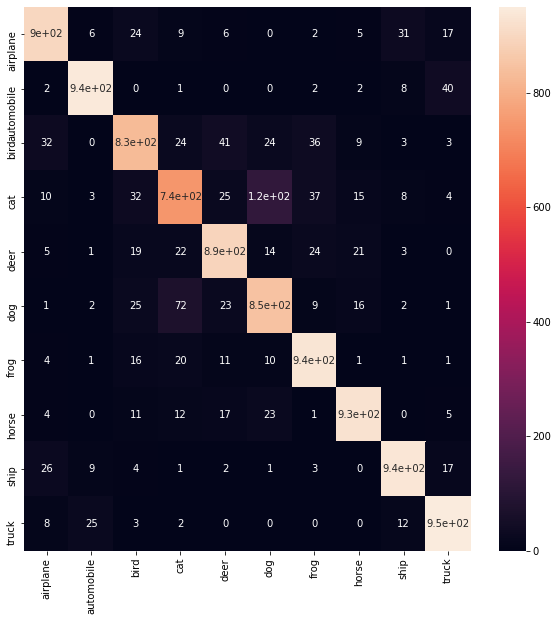

In [19]:
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
matrix = metrics.confusion_matrix(trueClasses,predictedClasses)

df_cm = pd.DataFrame(matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,10))
ax = sn.heatmap(df_cm, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)